In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# Setting seed for reproducibility
np.random.seed(1)

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# Loading the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# flatten the train images
x_train_flatten = x_train.reshape(x_train.shape[0], -1)

#flatten the test images
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# perform one hot encoding for train labels
y_train_labels = np.zeros([y_train.shape[0], 10])
y_train_labels[np.arange(y_train.shape[0]), y_train] = 1

# perform one hot encoding for test labels 
y_test_labels = np.zeros([y_test.shape[0], 10])
y_test_labels[np.arange(y_test.shape[0]), y_test] = 1

# define hyperparameters
num_of_neurons_input = 784
num_of_neurons_hidden = 75
num_of_neurons_output = 10

print (x_train_flatten.shape)
print (y_train_labels.shape)

(60000, 784)
(60000, 10)


In [7]:
# Creating a class for Neural Network Architecture
class NeuralNetwork:
    def __init__(self, input_size, no_hidden_neurons, output_size):
        '''
        creates a neural network with the given architecture and
        initializes the weight matrix with normally distributed values
        and bias to 0
        '''
        self.w1 = np.random.randn(input_size, no_hidden_neurons)
        self.w2 = np.random.randn(no_hidden_neurons, output_size)
        self.b1 = np.zeros([1, no_hidden_neurons])
        self.b2 = np.zeros([1, output_size])
        self.learning_rate = 0.002
        
    def sigmoid_activation(self, x):
        '''
        Sigmoid Function
        '''
        return 1/(1+np.exp(-x))
    
    def sigmoid_prime(self, x):
        '''
        Sigmoid Function Derivative
        '''
        return x*(1-x)
    
    def softmax_activation(self,x):
        '''
        Softmax Function
        '''
        expX = np.exp(x)
        return expX/expX.sum(axis=1, keepdims=True)

    def softmax_prime(self,x):
        '''
        Softmax Function Derivative
        '''
        return x*(1-x)
    
    def forward(self, x):
        '''
        Feed forward step of neural network
        '''
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid_activation(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = self.softmax_activation(z2)
        return self.a2
    
    def backward(self, x, y_pred, y_actual):
        '''
        Backpropagation of Error
        '''
        output_error = y_actual - y_pred
        output_delta = output_error * self.softmax_prime(y_pred)
        
        hidden_error = output_delta.dot(self.w2.T)
        hidden_delta = hidden_error * self.sigmoid_prime(self.a1)
        
        self.w1 += self.learning_rate * x.T.dot(hidden_delta)
        self.w2 += self.learning_rate * self.a1.T.dot(output_delta)
        
        self.b1 += self.learning_rate * np.sum(hidden_delta, axis=0)
        self.b2 += self.learning_rate * np.sum(output_delta, axis=0)

    def predict(self, x):
        '''
        Predicting Result for Test Dataset
        '''
        output_activation = self.forward(x)
        output_labels = np.zeros_like(output_activation)
        output_labels[np.arange(x.shape[0]), output_activation.argmax(1)] = 1
        return output_labels
    
    def train (self, x, y):
        '''
        Training the neural network for train dataset
        '''
        o = self.forward(x)
        self.backward(x, o, y)

# Initializing object of NeuralNetwork Class
nn = NeuralNetwork(num_of_neurons_input, num_of_neurons_hidden, num_of_neurons_output)
accuracy_per_epoch = []

# Training for epochs on a batch size of 20
for epoch in range(350):
    for i in range(0,60000,20):
        x = x_train_flatten[i:i+20, :]
        y = y_train_labels[i:i+20, :]   
        nn.train(x,y)
    pred_labels = np.argmax(nn.predict(x_train_flatten), axis=1)
    y_labels = np.argmax(y_train_labels, axis=1)
    accuracy = np.sum([1 for i in range(60000) if pred_labels[i] == y_labels[i]])/60000.
    if epoch%5==0:
        print ("epoch no {0}: Accuracy: {1} ".format(epoch+1, accuracy))
    accuracy_per_epoch.append(accuracy)
    
pred_labels = np.argmax(nn.predict(x_test_flatten), axis=1)
y_labels = np.argmax(y_test_labels, axis=1)

test_accuracy = np.sum([1 for i in range(10000) if pred_labels[i] == y_labels[i]])/10000.
print ("test accuracy is {0}".format(test_accuracy))

epoch no 1: Accuracy: 0.33145 
epoch no 6: Accuracy: 0.6765666666666666 
epoch no 11: Accuracy: 0.7536166666666667 
epoch no 16: Accuracy: 0.7826666666666666 
epoch no 21: Accuracy: 0.7985833333333333 
epoch no 26: Accuracy: 0.8190166666666666 
epoch no 31: Accuracy: 0.8290833333333333 
epoch no 36: Accuracy: 0.8388833333333333 
epoch no 41: Accuracy: 0.84565 
epoch no 46: Accuracy: 0.8534 
epoch no 51: Accuracy: 0.8564666666666667 
epoch no 56: Accuracy: 0.8654333333333334 
epoch no 61: Accuracy: 0.86615 
epoch no 66: Accuracy: 0.8699833333333333 
epoch no 71: Accuracy: 0.86895 
epoch no 76: Accuracy: 0.8715 
epoch no 81: Accuracy: 0.8769166666666667 
epoch no 86: Accuracy: 0.881 
epoch no 91: Accuracy: 0.8835166666666666 
epoch no 96: Accuracy: 0.8837166666666667 
epoch no 101: Accuracy: 0.8836333333333334 
epoch no 106: Accuracy: 0.889 
epoch no 111: Accuracy: 0.8879333333333334 
epoch no 116: Accuracy: 0.89125 
epoch no 121: Accuracy: 0.8875333333333333 
epoch no 126: Accuracy: 0.8

Text(0.5, 1.0, 'accuracy vs no of epochs')

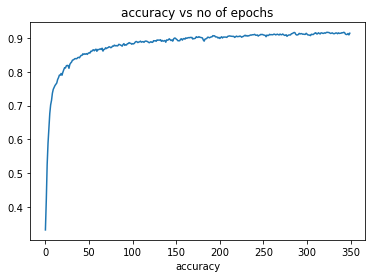

In [8]:
# Plotting a graph of accuracy and epochs
plt.plot(np.arange(0,350,1),accuracy_per_epoch)
plt.xlabel('no of epochs')
plt.xlabel('accuracy')
plt.title('accuracy vs no of epochs')

## References -

https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)

https://dev.to/shamdasani/build-a-flexible-neural-network-with-backpropagation-in-python

https://www.python-course.eu/neural_networks_with_python_numpy.php

## Submitted By - 

Deepansh Pandey

Swaroop Bhandary